# Data-Level Imbalance Handling Techniques: A Comparative Study on Credit Card Fraud Detection
DSCI Senior Project  
Malak Gaballa - Masa Tantawy - Moustafa El Mahdy
# Data Imbalance Handling Phase

## Imports and Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/University/8. Spring 2024/Thesis/CSVs/train.csv")
#df = pd.read_csv("/content/drive/MyDrive/Thesis/CSVs/train.csv")

df.head(3)

,amt,gender,city_pop,Month,Hour,age,job_Agriculture,job_Business,job_Creative,job_Education,...,region_West,distance,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,is_fraud
0,-0.326279,0,-0.290814,-0.257069,-0.118789,1.810280,0,0,0,0,...,0,1.307092,0,1,0,0,0,0,0,0
1,0.785585,1,-0.223335,0.753949,-0.265612,-0.597602,0,0,0,0,...,0,1.162314,0,0,0,0,0,0,1,0
2,-0.162638,0,-0.290618,-0.257069,-0.265612,0.549009,0,1,0,0,...,1,1.256416,0,0,0,0,0,1,0,0


In [ ]:
df.shape

(444575, 42)

In [ ]:
print('Class 0: ',sum(df.is_fraud == 0))
print('Class 1: ',sum(df.is_fraud == 1))

Class 0:  442859
Class 1:  1716


In [ ]:
X = df.iloc[:,:-1]
Y = df.is_fraud

In [ ]:
#col = '#c5a059'
col = '#05c3dd'

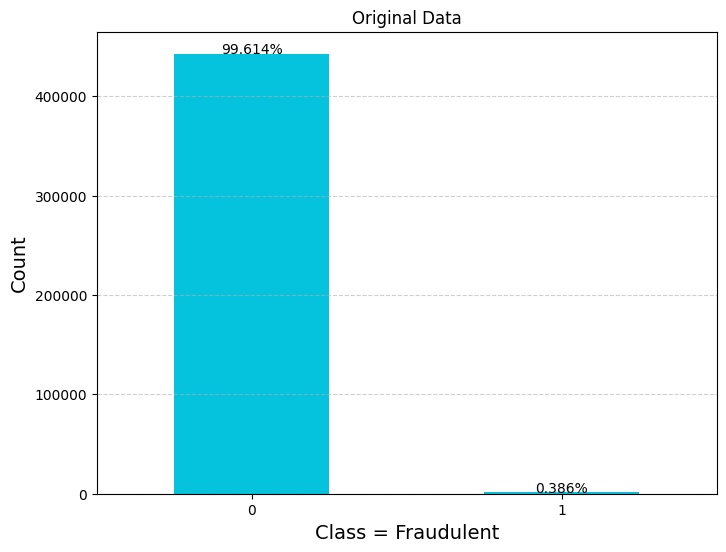

In [ ]:
# Plot
counts = Y.value_counts().sort_index()

plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color= col)
plt.title('Original Data')
plt.xlabel('Class = Fraudulent', fontsize= 14)
plt.ylabel('Count', fontsize= 14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)


# Adding count on each bar
for i, count in enumerate(counts):
  percentage = round(count/ len(Y) * 100, 3)
  plt.text(i, count, f'{percentage}%', ha='center')

plt.show()

## Undersampling
- Random Undersampling (RUS)
- Tomeklinks

### RUS

In [ ]:

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

X_rus, Y_rus = rus.fit_resample(X, Y)
print('Resampled dataset shape %s' % Counter(Y_rus))

rus = pd.DataFrame(X_rus, columns= X.columns)
rus['is_fraud'] = Y_rus

Resampled dataset shape Counter({0: 1716, 1: 1716})


In [ ]:
# Save the DataFrame to a CSV file
rus.to_csv('/content/drive/MyDrive/University/8. Spring 2024/Thesis/CSVs/df_rus.csv', index=False)

In [ ]:
rus = pd.read_csv('/content/drive/MyDrive/University/8. Spring 2024/Thesis/CSVs/df_rus.csv')
Y_rus = rus.is_fraud

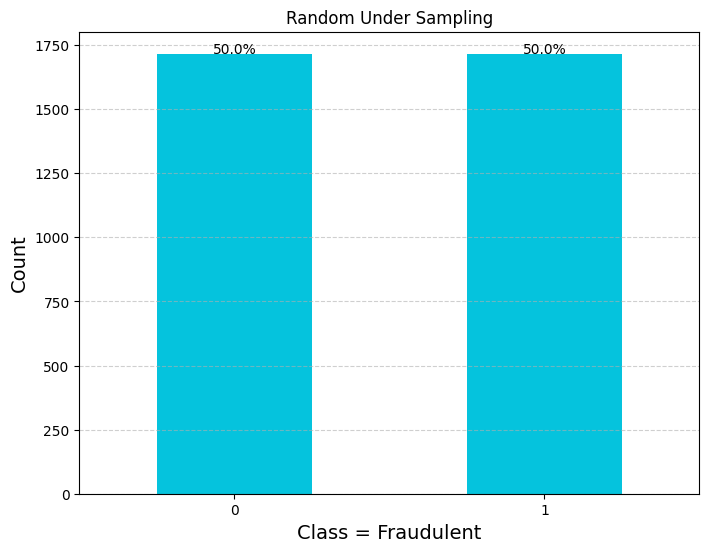

In [ ]:
# Plot
counts = Y_rus.value_counts().sort_index()

plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color= col)
plt.title('Random Under Sampling')
plt.xlabel('Class = Fraudulent', fontsize= 14)
plt.ylabel('Count', fontsize= 14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adding count on each bar
for i, count in enumerate(counts):
  percentage = round(count/ len(Y_rus) * 100, 3)
  plt.text(i, count, f'{percentage}%', ha='center')

plt.show()

### Tomeklinks

In [ ]:

from imblearn.under_sampling import TomekLinks
tl = TomekLinks()

X_tl, Y_tl = tl.fit_resample(X, Y)
print('Resampled dataset shape %s' % Counter(Y_tl))

tl = pd.DataFrame(X_tl, columns= X.columns)
tl['is_fraud'] = Y_tl

Resampled dataset shape Counter({0: 442622, 1: 1716})


In [ ]:
# Save the DataFrame to a CSV file
tl.to_csv('/content/drive/MyDrive/University/8. Spring 2024/Thesis/CSVs/df_tl.csv', index=False)

In [ ]:
tl = pd.read_csv('/content/drive/MyDrive/University/8. Spring 2024/Thesis/CSVs/df_tl.csv')
Y_tl = tl.is_fraud

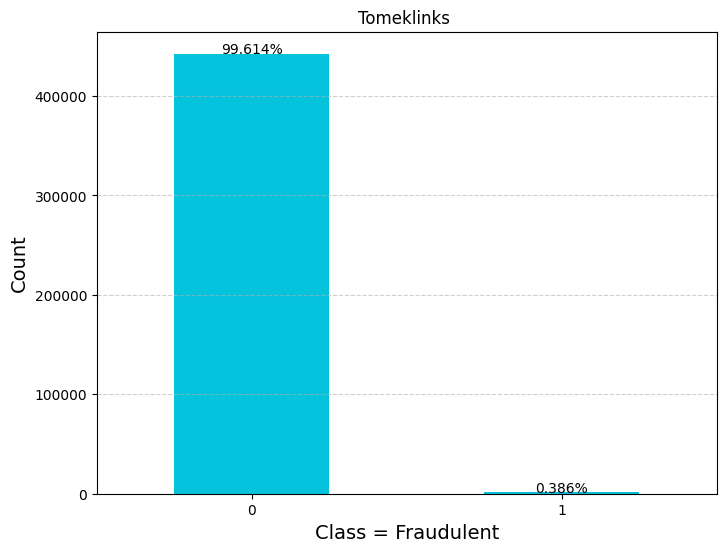

In [ ]:
# Plot
counts = Y_tl.value_counts().sort_index()

plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color= col)
plt.title('Tomeklinks ')
plt.xlabel('Class = Fraudulent', fontsize= 14)
plt.ylabel('Count', fontsize= 14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adding count on each bar
for i, count in enumerate(counts):
  percentage = round(count/ len(Y_tl) * 100, 3)
  plt.text(i, count, f'{percentage}%', ha='center')

plt.show()

## Oversampling
- Random Oversampling (ROS)
- SMOTE

### ROS

In [ ]:

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

X_ros, Y_ros = ros.fit_resample(X, Y)
print('Resampled dataset shape %s' % Counter(Y_ros))

ros = pd.DataFrame(X_ros, columns= X.columns)
ros['is_fraud'] = Y_ros

Resampled dataset shape Counter({0: 442859, 1: 442859})


In [ ]:
# Save the DataFrame to a CSV file
ros.to_csv('/content/drive/MyDrive/University/8. Spring 2024/Thesis/CSVs/df_ros.csv', index=False)

In [ ]:
ros = pd.read_csv('/content/drive/MyDrive/University/8. Spring 2024/Thesis/CSVs/df_ros.csv')
Y_ros = ros.is_fraud

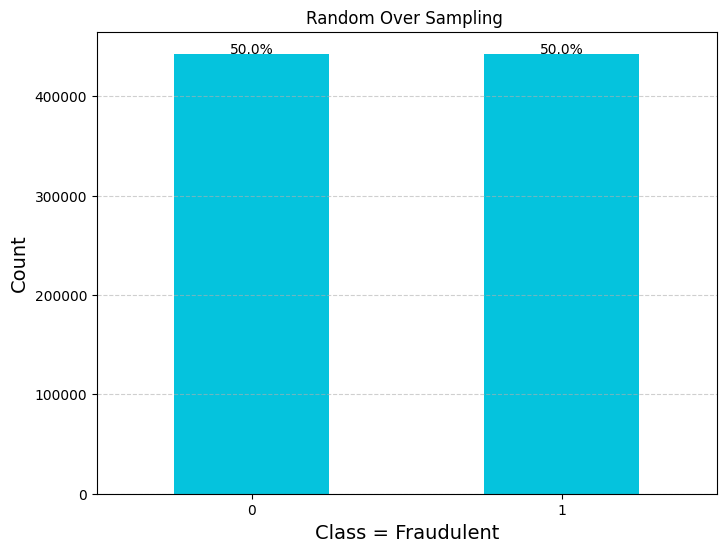

In [ ]:
# Plot
counts = Y_ros.value_counts().sort_index()

plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color= col)
plt.title('Random Over Sampling ')
plt.xlabel('Class = Fraudulent', fontsize= 14)
plt.ylabel('Count', fontsize= 14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adding count on each bar
for i, count in enumerate(counts):
  percentage = round(count/ len(Y_ros) * 100, 3)
  plt.text(i, count, f'{percentage}%', ha='center')

plt.show()

### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

X_sm, Y_sm = sm.fit_resample(X, Y)
print('Resampled dataset shape %s' % Counter(Y_sm))

sm = pd.DataFrame(X_sm, columns= X.columns)
sm['is_fraud'] = Y_sm

Resampled dataset shape Counter({0: 442859, 1: 442859})


In [ ]:
# Save the DataFrame to a CSV file
sm.to_csv('/content/drive/MyDrive/University/8. Spring 2024/Thesis/CSVs/df_smote.csv', index=False)

In [ ]:
sm = pd.read_csv('/content/drive/MyDrive/University/8. Spring 2024/Thesis/CSVs/df_smote.csv')
Y_sm = sm.is_fraud

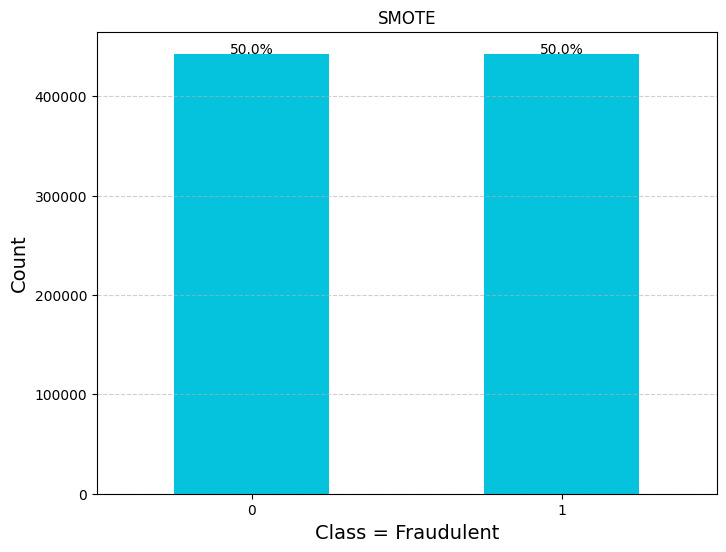

In [ ]:
# Plot
counts = Y_sm.value_counts().sort_index()

plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color= col)
plt.title('SMOTE')
plt.xlabel('Class = Fraudulent', fontsize= 14)
plt.ylabel('Count', fontsize= 14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adding count on each bar
for i, count in enumerate(counts):
  percentage = round(count/ len(Y_sm) * 100, 3)
  plt.text(i, count, f'{percentage}%', ha='center')

plt.show()

## Oversampling followed by Undersampling
- Smote + Tomek (SmoteTomek)
-  Smote + ENN (Smoteen)


### SmoteTomek

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)

X_smt, Y_smt = smt.fit_resample(X, Y)
print('Resampled dataset shape %s' % Counter(Y_smt))

smt = pd.DataFrame(X_smt, columns= X.columns)
smt['is_fraud'] = Y_smt

Resampled dataset shape Counter({0: 442859, 1: 442859})


In [ ]:
# Save the DataFrame to a CSV file
#smt.to_csv('content/drive/MyDrive/University/8. Spring 2024/Thesis/CSVs/df_smotetomek.csv', index=False)
smt.to_csv('/content/drive/MyDrive/Thesis/CSVs/df_smotetomek.csv', index=False)

In [ ]:
smt = pd.read_csv('/content/drive/MyDrive/University/8. Spring 2024/Thesis/CSVs/df_smotetomek.csv')
Y_smt = smt.is_fraud

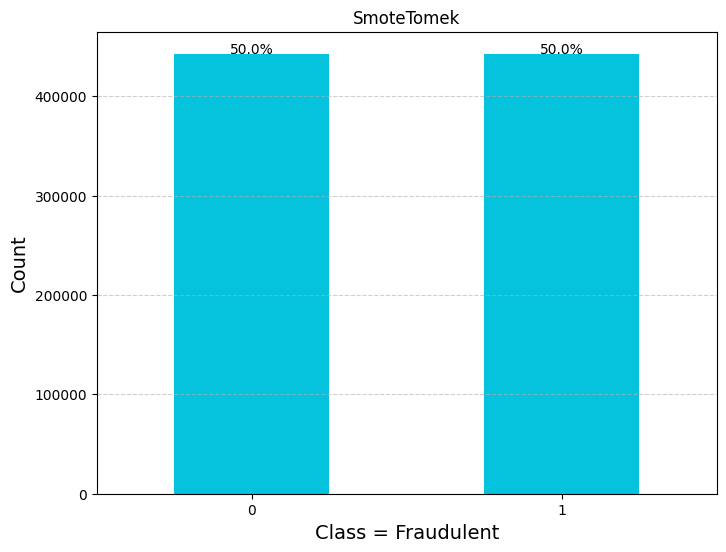

In [ ]:
# Plot
counts = Y_smt.value_counts().sort_index()

plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color= col)
plt.title('SmoteTomek')
plt.xlabel('Class = Fraudulent', fontsize= 14)
plt.ylabel('Count', fontsize= 14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adding count on each bar
for i, count in enumerate(counts):
  percentage = round(count/ len(Y_smt) * 100, 3)
  plt.text(i, count, f'{percentage}%', ha='center')

plt.show()

### Smoteen

In [ ]:

from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state=42)

X_smn, Y_smn = sme.fit_resample(X, Y)
print('Resampled dataset shape %s' % Counter(Y_smn))


smn = pd.DataFrame(X_smn, columns= X.columns)
smn['is_fraud'] = Y_smn

Resampled dataset shape Counter({1: 442859, 0: 439881})


In [ ]:
# Save the DataFrame to a CSV file
smn.to_csv('/content/drive/MyDrive/Thesis/CSVs/df_smoteen.csv', index=False)

In [ ]:
smn = pd.read_csv('/content/drive/MyDrive/University/8. Spring 2024/Thesis/CSVs/df_smoteen.csv')
Y_smn = smn.is_fraud

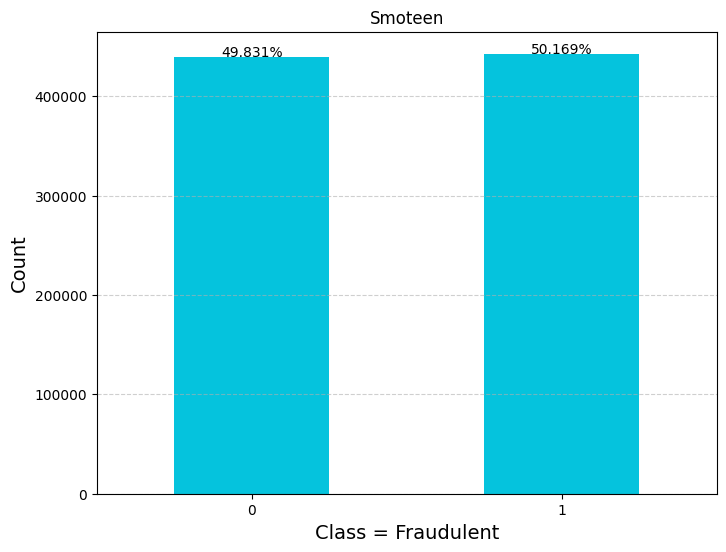

In [ ]:
# Plot
counts = Y_smn.value_counts().sort_index()

plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color= col)
plt.title('Smoteen')
plt.xlabel('Class = Fraudulent', fontsize= 14)
plt.ylabel('Count', fontsize= 14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adding count on each bar
for i, count in enumerate(counts):
  percentage = round(count/ len(Y_smn) * 100, 3)
  plt.text(i, count, f'{percentage}%', ha='center')

plt.show()

## Data Shape

In [ ]:
print("RUS: ", Y_rus.shape[0])
print("TL: ", Y_tl.shape[0])

print("ROS: ", Y_ros.shape[0])
print("SMOTE: ", Y_smt.shape[0])

print("Smotetomek: ", Y_smt.shape[0])
print("Smoteen: ", Y_smn.shape[0])

RUS:  3432
TL:  444338
ROS:  885718
SMOTE:  885718
Smotetomek:  885718
Smoteen:  882740
